<div class="alert alert-block alert-info">
    <h1>Natural Language Processing</h1>
    <h3>General Information:</h3>
    <p>Please do not add or delete any cells. Answers belong into the corresponding cells (below the question). If a function is given (either as a signature or a full function), you should not change the name, arguments or return value of the function.<br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>).</p>
    <p>Code cells where you are supposed to give your answer often include the line  ```raise NotImplementedError```. This makes it easier to automatically grade answers. If you edit the cell please outcomment or delete this line.</p>
    <h3>Submission:</h3>
    <p>Please submit your notebook via the web interface (in the main view -> Assignments -> Submit). The assignments are due on <b>Wednesday at 15:00</b>. If this does not work there is a submission slot on LEA.</p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p>
    
</div>

# Bigram Language Model

We want to build a count based bigram language model based on the book *Emma* by *Jane Austen*.

In the next cell the book is read into the variables ```emma_sents``` and ```emma_words```.

If the cell throws an error please execute the outcommented lines to download the data needed. This only needs to be done once.

In [2]:
from nltk.corpus import gutenberg

import nltk
#nltk.download('gutenberg')
#nltk.download('punkt')

emma_sents = gutenberg.sents('austen-emma.txt')
emma_words = gutenberg.words('austen-emma.txt')

## 1.1) Statistics [4 Points]

Please calculate the number of types and tokens for the book and save the values in the variables ```types``` and ```tokens```.

In [3]:
types = 0
tokens = 0

#Tokens - occurrences of words
#Types -  unique words
tokens = len(emma_words)
types = len(set(emma_words))

print('The book Emma by Jane Austen consists of {} tokens and {} types.'.format(
    tokens,
    types
))

The book Emma by Jane Austen consists of 192427 tokens and 7811 types.


In [4]:
# This is a test cell, please ignore it!

## 1.2) Heap's Law

Let us validate Heap's law from the first chapter we read:

$|V| = k * N^{\beta}$

### 1.2.1) Empirical Study [8 Points]

We first want to plot the relationship between types and tokens for the book *Emma* by *Jane Austen*.

For this you should fill the lists ```number_of_types``` and ```number_of_tokens``` with the corresponding values.

So we want to investigate how many types we have after 1 token, 2 tokens, 3 tokens until we have read all the words from the book.

*Example:*

- ```number_of_tokens```: ```[1, 2, 3, ..., 16, 17, 18, ...]```
- ```number_of_types```:  ```[1, 2, 3, ..., 13, 14, 14, ...]```

In [6]:
import numpy as np
import time

number_of_tokens = []
number_of_types = []

#Method to calculate number of types and number of tokens
def num_tokens_types(tokens):
    number_of_tokens = np.arange(1,len(tokens)+1)
    number_of_types= [0]
    #add() method adds a given element to a set. If the element is already present, it doesn't add any element.
    token = {tokens[0]}
    for i in range(1,len(tokens)):
        token.add(tokens[i])
        number_of_types.append(len(token))
    return number_of_tokens,number_of_types

number_of_tokens, number_of_types = num_tokens_types(emma_words)
    
for i in [10, 100, 1000, 10000]:
    print('After reading {} tokens we found {} types.'.format(number_of_tokens[i-1], number_of_types[i-1]))

After reading 10 tokens we found 10 types.
After reading 100 tokens we found 70 types.
After reading 1000 tokens we found 410 types.
After reading 10000 tokens we found 1745 types.


In [7]:
# This is a test cell, please ignore it!

### 1.2.2) Plot [10 Points]

Please plot your findings:

- x-Axis: Number of tokens
- y-Axis: Number of types

Make sure your plot has a grid, a legend, a title and x- and y-label.

Add the values for the three books by Jane Austen as points in the plot.

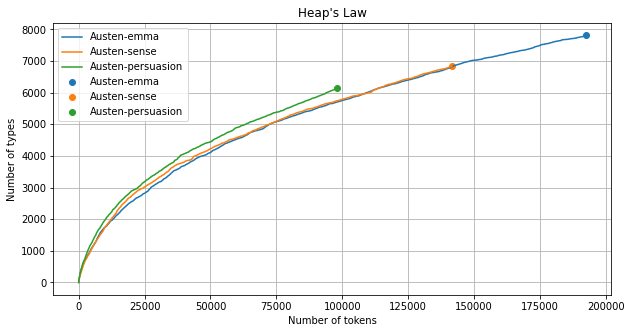

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

#Load data
sense = gutenberg.words('austen-sense.txt')
persuasion = gutenberg.words('austen-persuasion.txt')

#Plotting number of tokens vs number of types for three books, also their last point 
number_of_tokens_sense, number_of_types_sense = num_tokens_types(sense)
number_of_tokens_persuasion, number_of_types_persuasion = num_tokens_types(persuasion)

plt.plot(number_of_tokens,number_of_types, label= "Austen-emma")
plt.scatter(number_of_tokens[-1],number_of_types[-1], label = "Austen-emma")

plt.plot(number_of_tokens_sense,number_of_types_sense, label= "Austen-sense")
plt.scatter(number_of_tokens_sense[-1], number_of_types_sense[-1], label= "Austen-sense")

plt.plot(number_of_tokens_persuasion,number_of_types_persuasion, label = "Austen-persuasion")
plt.scatter(number_of_tokens_persuasion[-1], number_of_types_persuasion[-1], label ="Austen-persuasion")

plt.xlabel('Number of tokens')
plt.ylabel('Number of types')
plt.legend()
plt.title("Heap's Law")
plt.grid()
plt.show()

### 1.2.3) Estimate parameters $k$ and $\beta$ [8 points]

We want to estimate the parameters $k$ and $\beta$ for Heap's law based on our book.

Use the function ```curve_fit``` from ```scipy.optimize``` with the previously calculated lists. Save your solution in the variables ```k``` and ```beta```.

```curve_fit``` takes in three arguments, the function that relatex x values to y values together with its parameters, the observed x-values and the observed y-values. It return popt (the optimal parameters) and pcov (how well they fit).

In [9]:
from scipy.optimize import curve_fit

def func(x, k, beta):
    return k * x**beta

k = 0
beta = 0

popt, pconv = curve_fit(func, number_of_tokens, number_of_types)
k = popt[0]
beta = popt[1]

print('For the book Emma estimate k = {:.2f} and beta = {:.2f}'.format(k,beta))

For the book Emma estimate k = 20.59 and beta = 0.49


In [10]:
# This is a test cell, please ignore it!

### 1.2.4) Combined plot [10 Points]

In our Gutenberg corpus we have the following books by Jane Austen:

- Emma ```gutenberg.words('austen-emma.txt')```
- Sense ```gutenberg.words('austen-sense.txt')```
- Persuasion ```gutenberg.words('austen-persuasion.txt')```

Plot the number of types and tokens for each book as a point (total number of types and tokens) together with the function $|V| = k N^{\beta}$ with your estimated parameters.

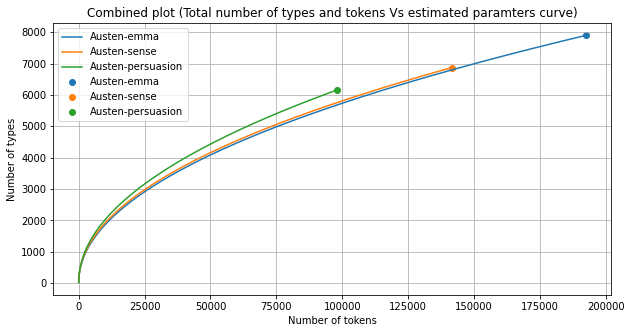

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

#Getting estimated parameters for different books
popt_emma, pconv_emma = curve_fit(func, number_of_tokens, number_of_types)
popt_sense, pconv_sense = curve_fit(func, number_of_tokens_sense, number_of_types_sense)
popt_persuasion, pconv_persuasion = curve_fit(func, number_of_tokens_persuasion, number_of_types_persuasion)

#Plotting number of types and tokens with estimated parameters
plt.plot(number_of_tokens, func(number_of_tokens, popt_emma[0], popt_emma[1]), label = "Austen-emma")
plt.scatter(number_of_tokens[-1], func(number_of_tokens, popt_emma[0], popt_emma[1])[-1], label = "Austen-emma")

plt.plot(number_of_tokens_sense, func(number_of_tokens_sense, popt_sense[0], popt_sense[1]), label = "Austen-sense")
plt.scatter(number_of_tokens_sense[-1], func(number_of_tokens_sense, popt_sense[0], popt_sense[1])[-1], label = "Austen-sense")

plt.plot(number_of_tokens_persuasion, func(number_of_tokens_persuasion, popt_persuasion[0], popt_persuasion[1]), label = "Austen-persuasion")
plt.scatter(number_of_tokens_persuasion[-1], func(number_of_tokens_persuasion, popt_persuasion[0], popt_persuasion[1])[-1], label = "Austen-persuasion")

plt.title("Combined plot (Total number of types and tokens Vs estimated paramters curve)")
plt.xlabel("Number of tokens")
plt.ylabel("Number of types")

plt.legend()
plt.grid()
plt.show()

## 2.1) Bigram Model [50 Points]

We now want to build a bigram language model from the book *Emma* by *Jane Austen*.

For this you should use the class given in the next cell.

1. Read in the sentences from the book *Emma* by *Jane Austen*
2. Write a method that returns the unigram count
3. Write a method that returns the unigram probability
4. Write a method that returns the bigram count
5. Write a method that returns the bigram probability
6. Write a method that returns the sentence probability based on bigrams

*Hints:*

- The next cell gives you some inspiration on how to implement the counting of bigrams
- Everything should be precomputed in the constructor (```__init__```) and the other functions should not recount anything. If implemented efficiently all the computation will be done in a few seconds (less than 10)!
- This class should be **self-contained** and not depend on any code from previous cells!
- The ```window``` function is a memory friendly iterator over a list that gives you all n-grams from the list

In [12]:
'''
Example (you do not need to edit this cell):

Suppose you have a very small corpus consisting of only the
four unique words 'I', 'have', 'a', 'dog' and 
the sentence start and end markers '<s>' and '</s>'

The corpus has the three sentences
- <s> I have a dog </s>
- <s> a dog I have </s>
- <s> a dog </s>
'''
import numpy as np

# First we define the index for each word (the order does not matter)
index = {
    'I': 0,
    'have': 1,
    'a': 2,
    'dog': 3,
    '<s>': 4,
    '</s>': 5
}

# These are our bigrams from the sentences
bigrams = [('<s>', 'I'), ('I', 'have'), ('have', 'a'), ('a', 'dog'), ('dog', '</s>'),
           ('</s>', '<s>'), ('<s>', 'a'), ('a', 'dog'), ('dog', 'I'), ('I', 'have'), ('have', '</s>'),
           ('</s>', '<s>'), ('<s>', 'a'), ('a', 'dog'), ('dog', '</s>')]

# Next we create a matrix for the bigram counts,
# each entry is a 16 Bit unsigned integer (dtype=np.uint16)
counts = np.zeros((len(index), len(index)), dtype=np.uint16)

# Fill it with the counts
for bigram in bigrams:
    index_first_word = index[bigram[0]]
    index_second_word = index[bigram[1]]
    counts[index_first_word, index_second_word] += 1
    
# Print out count matrix
print(counts)

# Check the count for the bigram ('I', 'have'):
print('The bigram ("I", "have") exists {} times.'.format(
    counts[index['I'], index['have']]
))

[[0 2 0 0 0 0]
 [0 0 1 0 0 1]
 [0 0 0 3 0 0]
 [1 0 0 0 0 2]
 [1 0 2 0 0 0]
 [0 0 0 0 2 0]]
The bigram ("I", "have") exists 2 times.


In [13]:
import numpy as np
from typing import List
from collections import Counter
from itertools import islice
from nltk.corpus import gutenberg
from nltk.util import pad_sequence

class BigramModel:
    
    def __init__(self, sentences: List[List[str]]):
        '''
        Takes in a list of sentences, where each sentence is a 
        list of words.
        
        Arguments:
            sentences -- List of lists of words (e.g. [['I', 'have', 'a', 'dog'],
                                                       ['a', 'dog', 'I', 'have']])
        '''
        self.corpus = []
        
        #Add '<s>' to start and '</s>' to end of sentence
        for sentence in sentences:
            self.corpus.append(['<s>'] + sentence + ['</s>'])
        
        #Create dictionary containing unique words, which can be used for bigram counts.
        #Use list comprehension to convert a list of lists to a flat list and store in "arrays"
        arrays = []
        for word in self.corpus:
            for sent in word:
                arrays.append(sent)
        self.corpus_len = len(arrays)
        self.unique_words = list(set(arrays))
        
        #Creating dictionary of unique words
        self.dict_unique_words = {dict_key: i for i, dict_key in enumerate(self.unique_words)}
        
        #Obtaining unigram counts  
        self.unigram_counts = Counter([word for sent in self.corpus for word in sent])
        
        #Obtaining bigram counts. Creating matrix for bigram counts. 
        self.bigram_counts = np.zeros((len(self.dict_unique_words), len(self.dict_unique_words)),dtype=np.uint16)
        
        #Filling bigram with bigram counts
        for sentence in self.corpus:
            for sent in self.window(sentence):
                first_word_index = self.dict_unique_words[sent[0]]
                second_word_index = self.dict_unique_words[sent[1]]
                self.bigram_counts[first_word_index, second_word_index] += 1
                
    def window(self, seq, n=2):
        '''
        Returns a sliding window (of width n) over data from the iterable
        
        Arguments:
            seq      -- the iterable (e.g. list, set, etc) to run the window over
            n        -- the size of the window
        Returns:
            iterator -- an iterator over the sliding windows
            
        Usage:
            my_list = [1, 2, 3, 4]
            for slice in self.window(my_list):
                print(slice)
                
            # Output: (1, 2)
                      (2, 3)
                      (3, 4)
        '''
        "Returns a sliding window (of width n) over data from the iterable"
        "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
        it = iter(seq)
        result = tuple(islice(it, n))
        if len(result) == n:
            yield result
        for elem in it:
            result = result[1:] + (elem,)
            yield result
            
    def unigram_count(self, word: str) -> int:
        '''
        Returns the unigram count for the word.
        If the word does not exist in our corpus, return 0.
        
        Arguments:
            word  -- word we want to know the count of
        Returns:
            count -- how often the word appears in the corpus
        '''
        
        if(word in self.unique_words):
            return self.unigram_counts[word]
        else:
            return 0

    def unigram_probability(self, word:str) -> float:
        '''
        Returns the unigram probability for the word.
        If the word does not exist in our corpus, return 0.
        
        Arguments:
            word        -- word we want to know the probability of
        Returns:
            probability -- how likely it is to choose the word at random
        '''
        
        prob = self.unigram_counts[word]/self.corpus_len
        return prob
    
    def bigram_count(self, word1:str, word2:str) -> int:
        '''
        Returns the bigram count for the word1 followed by word2.
        If either of the words does not exist in our corpus, return 0.
        
        Arguments:
            word1  -- first word of the bigram
            word2  -- second word of the bigram
        Returns:
            count  -- how often the bigram appears in the corpus
        '''
    
        if((word1 in self.dict_unique_words) and (word2 in self.dict_unique_words)):
            return self.bigram_counts[self.dict_unique_words[word1]][self.dict_unique_words[word2]]
        else:
            return 0
        
    def bigram_probability(self, word1:str, word2:str) -> float:
        '''
        Returns the bigram probability for the word1 followed by word2.
        This is the conditional probability P(word2 | word1).
        If either of the words does not exist in our corpus, return 0.
        
        Arguments:
            word1       -- first word of the bigram
            word2       -- second word of the bigram
        Returns:
            probability -- how likely it is to choose the word at random
        '''
    
        if(word1 in self.dict_unique_words):
            probability = (self.bigram_count(word1, word2))/(self.unigram_counts[word1])
            return probability
        
        else:
            return 0
            
    
    def sentence_probability(self, sentence:List[str]) -> float:
        '''
        Return the probability for the given sentence based on our
        bigram probabilities
        
        Arguments:
            sentence    -- list of tokens from the sentence 
                           (e.g. ['<s>', 'I', 'have', 'a', 'dog', '</s>'])
        Returns:
            probability -- probability of the sentence
        '''
        
        probability = 1
        for sent in self.window(sentence):
            probability *= self.bigram_probability(sent[0],sent[1])
        return probability
          
model = BigramModel(gutenberg.sents('austen-emma.txt'))

# Some prints and tests

print('The unigram "I" appears {} times in the book!'.format(
    model.unigram_count('I')
)) ## Should print 3178

print('The probability for the unigram "Emma" is {:.4f}.'.format(
    model.unigram_probability('Emma')
)) ## Should print 0.0042

print('The bigram "I am" appears {} times in the book!'.format(
    model.bigram_count('I', 'am')
)) ## Should print 395

print('The probability for the bigram "I have" is {:.4f}.'.format(
    model.bigram_probability('I', 'have')
)) ## Should print 0.0884

print('The sentence probability for the sentence "What a horrible idea!" is {:.4e}.'.format(
    model.sentence_probability(['<s>', 'What', 'a', 'horrible', 'idea', '!', '</s>'])
)) ## Should print 6.4835e-10

The unigram "I" appears 3178 times in the book!
The probability for the unigram "Emma" is 0.0042.
The bigram "I am" appears 395 times in the book!
The probability for the bigram "I have" is 0.0884.
The sentence probability for the sentence "What a horrible idea!" is 6.4835e-10.


In [14]:
# This is a test cell, please ignore it!

## 2.2) Using the model [10 Points]

With our model we can now answer some questions.

1. How often does a certain word appear in the book?
    - Give the number of times the word 'dog' appears in the book - Store this in the variable ```count_dog```.
    - Give the number of times the word 'She' appears in the book - Store this in the variable ```count_She```.
2. How many sentences start or end with a certain word or token?
    - Give the probability that a sentence starts with the word 'I' - Store this in the variable ```p_sentence_begins_with_I```
    - Give the probability that a sentence ends with '!' - Store this in the variable ```p_sentence_ends_in_exlamation```

In [15]:
model = BigramModel(gutenberg.sents('austen-emma.txt'))

count_dog = 0
count_She = 0
p_sentence_begins_with_I = 0
p_sentence_ends_in_exlamation = 0

count_dog = model.unigram_count('dog')
count_She = model.unigram_count('She')
p_sentence_begins_with_I = model.bigram_probability('<s>','I')
p_sentence_ends_in_exlamation = model.bigram_count('!','</s>')/model.unigram_count('</s>')

print('The word "dog" appears {} time(s) in the book.'.format(
    count_dog
))
print('The word "She" appears {} time(s) in the book.'.format(
    count_She
))
print('The probability that a sentence starts with "I" is {:.4f}'.format(
    p_sentence_begins_with_I
))
print('The probability that a sentence ends in "!" is {:.4f}'.format(
    p_sentence_ends_in_exlamation
))

The word "dog" appears 1 time(s) in the book.
The word "She" appears 562 time(s) in the book.
The probability that a sentence starts with "I" is 0.0838
The probability that a sentence ends in "!" is 0.0708


In [16]:
# This is a test cell, please ignore it!